In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
results = pd.read_csv("../data/results.csv")

In [3]:
results

,Unnamed: 0,model,dataset,score,method,dimension
0,0,Logistic Regression,iris,1.000000,Original dimensionality,4
1,1,Random Forest Classifier,iris,1.000000,Original dimensionality,4
2,2,Logistic Regression,iris,0.966667,Principal Component Analysis,1
3,3,Random Forest Classifier,iris,0.933333,Principal Component Analysis,1
4,4,Linear Regression,california_housing,-0.002571,Principal Component Analysis,1
...,...,...,...,...,...,...
489,489,Random Forest Regressor,ames_housing,0.425935,Locally linear embedding,79
490,490,Logistic Regression,heart_attack,0.868852,Original dimensionality,13
491,491,Random Forest Classifier,heart_attack,0.836066,Original dimensionality,13
492,492,Logistic Regression,stroke,0.947500,Original dimensionality,21


In [5]:
def filter_df(df, model, dataset):
    return df[(df.model == model) & (df.dataset == dataset)]

In [9]:
df = filter_df(results, 'Linear Regression', 'ames_housing')

In [15]:
df

,Unnamed: 0,model,dataset,score,method,dimension
6,6,Linear Regression,ames_housing,0.097372,Principal Component Analysis,1
16,16,Linear Regression,ames_housing,0.682062,Principal Component Analysis,2
26,26,Linear Regression,ames_housing,0.683201,Principal Component Analysis,3
36,36,Linear Regression,ames_housing,0.080381,Locally linear embedding,1
46,46,Linear Regression,ames_housing,0.139936,Locally linear embedding,2
...,...,...,...,...,...,...
480,480,Linear Regression,ames_housing,0.755269,Locally linear embedding,75
482,482,Linear Regression,ames_housing,0.753346,Locally linear embedding,76
484,484,Linear Regression,ames_housing,0.752693,Locally linear embedding,77
486,486,Linear Regression,ames_housing,0.757019,Locally linear embedding,78


In [27]:
baseline = df[df.method == 'Original dimensionality']['score'][128]

In [52]:
def generate_plot(model, dataset):
    df = filter_df(results, model, dataset)
    print(df)
    if len(df) != 0:
        plt.figure()
        plot = sns.lineplot(x = 'dimension', y = 'score', hue = 'method', data = df)
        fig = plot.get_figure()
        fig.savefig(f"../data/{model}_{dataset}.png")

In [53]:
models = set(results.model.values)
datasets = set(results.dataset.values)

     Unnamed: 0              model             dataset      score  \
4             4  Linear Regression  california_housing  -0.002571   
14           14  Linear Regression  california_housing   0.022173   
24           24  Linear Regression  california_housing -68.351343   
34           34  Linear Regression  california_housing  -0.001582   
44           44  Linear Regression  california_housing  -0.000030   
54           54  Linear Regression  california_housing   0.001063   
62           62  Linear Regression  california_housing -43.531838   
64           64  Linear Regression  california_housing -73.994392   
72           72  Linear Regression  california_housing -62.323116   
80           80  Linear Regression  california_housing -50.346966   
88           88  Linear Regression  california_housing -46.548709   
96           96  Linear Regression  california_housing   0.000086   
104         104  Linear Regression  california_housing   0.027221   
112         112  Linear Regression

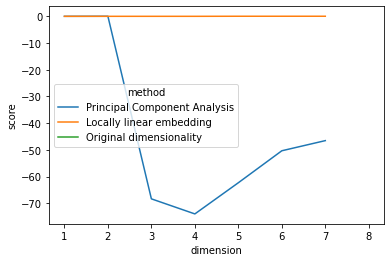

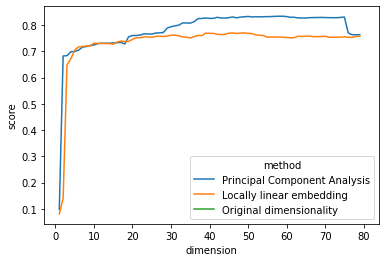

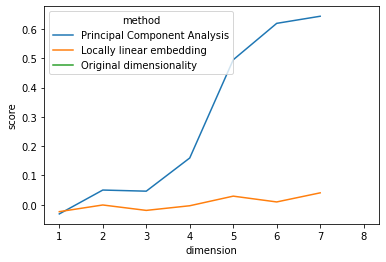

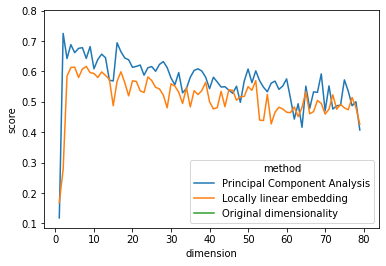

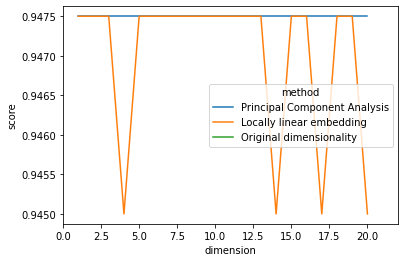

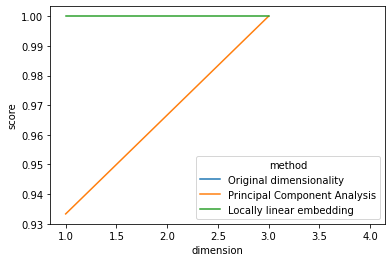

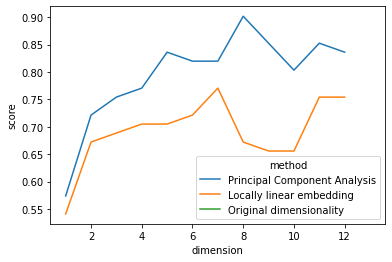

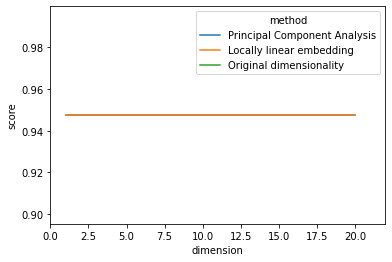

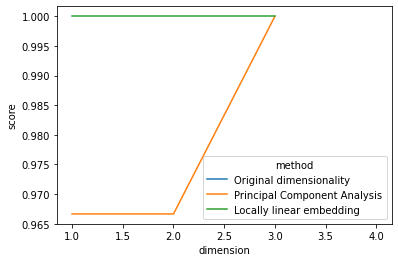

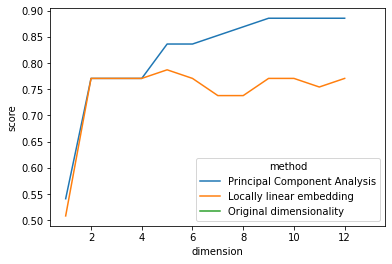

In [54]:
for model in models:
    for dataset in datasets:
        generate_plot(model, dataset)